# Data processing

In [208]:
#Import the required libraries
!pip install text_preprocessing
!pip install pyLDAvis
import numpy as np
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import unicodedata
import contractions
import string
import gensim
import gensim.corpora as corpora
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models import LdaModel


df = pd.read_json('/content/waitrose.json')#Read the file
df.head()#View the first few rows of the table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,matching_rules,display_text_range,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,2020-07-29 10:28:58,1288421250000000000,1288421250000000000,RT @HelpThemHelpUs_: Our friends at @Potsandco...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Tue Jul 28 16:29:56 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
1,2020-11-17 16:31:19,1328737494000000000,1328737494000000000,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,"<a href=""http://twitter.com/download/iphone"" r...",False,1.328654e+18,1.328654e+18,1.327758e+18,1.327758e+18,...,[{'tag': None}],"[57, 133]",None,NaN,NaN,NaN,None,None,None,NaN
2,2020-02-28 20:19:01,1233486785000000000,1233486785000000000,@waitrose the wine you delivered yesterday was...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,4.632874e+07,4.632874e+07,...,[{'tag': None}],None,None,NaN,NaN,NaN,None,None,None,NaN
3,2020-11-13 09:21:04,1327179666000000256,1327179666000000256,RT @jlandpartners: This Christmas we want to #...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Fri Nov 13 07:00:00 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN
4,2020-06-04 20:54:01,1268647218000000000,1268647218000000000,RT @RebeccaTillett1: @waitrose if the U.K. ach...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,[{'tag': None}],None,{'created_at': 'Thu Jun 04 16:31:25 +0000 2020...,NaN,NaN,NaN,None,None,None,NaN


In [209]:
df = df[['created_at', 'text', 'id_str']]#Select three columns to form a new table
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,created_at,text,id_str
0,2020-07-29 10:28:58,RT @HelpThemHelpUs_: Our friends at @Potsandco...,1288421250000000000
1,2020-11-17 16:31:19,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,1328737494000000000
2,2020-02-28 20:19:01,@waitrose the wine you delivered yesterday was...,1233486785000000000
3,2020-11-13 09:21:04,RT @jlandpartners: This Christmas we want to #...,1327179666000000256
4,2020-06-04 20:54:01,RT @RebeccaTillett1: @waitrose if the U.K. ach...,1268647218000000000


In [210]:
print(df.isnull().sum())#Check missing value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


created_at    0
text          0
id_str        0
dtype: int64


In [211]:
duplicates1 = df.duplicated().sum()#Check duplicates
print(duplicates1)

1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [212]:
df.drop_duplicates(keep='first', inplace=True)#Remove Rows with Duplicates
duplicates1 = df.duplicated().sum()#Check Duplicates again
print(duplicates1)

0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
#Output first and last time
print ('The begining date of the dataset is %s'%(str(min(df['created_at']))))
print ('The ending date of the dataset is %s'%(str(max(df['created_at']))))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The begining date of the dataset is 2020-01-01 06:16:18
The ending date of the dataset is 2020-12-30 23:46:25


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


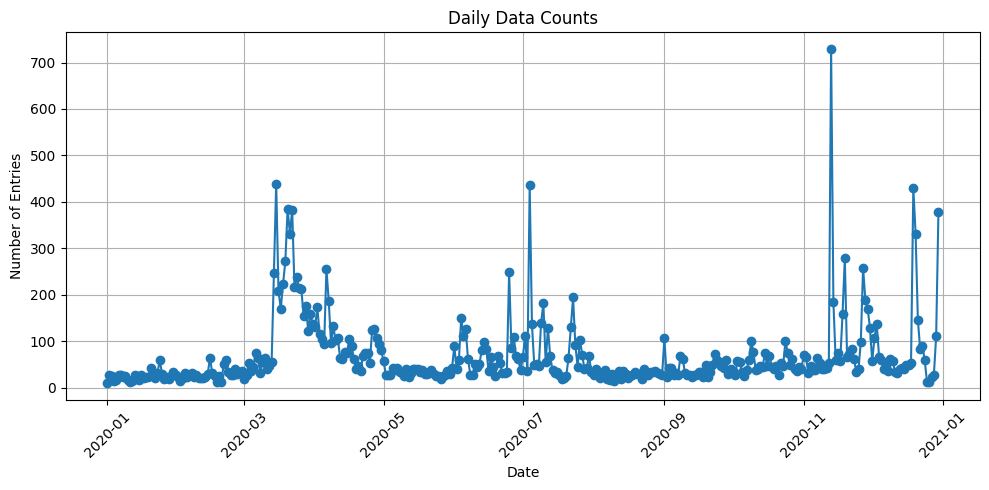

In [214]:
df['created_at'] = pd.to_datetime(df['created_at'])# Convert the 'created_at' column to datetime type
df.set_index('created_at', inplace=True)# Set the 'created_at' column as the DataFrame's index
df_resampled = df.resample('D').sum()# Resample the DataFrame to daily frequency, summing up all numerical columns
df_daily_counts = df.resample('D').count()# Resample the DataFrame to daily frequency, counting cells for each column

#drawing
plt.figure(figsize=(10, 5))
plt.plot(df_daily_counts.index, df_daily_counts['text'], marker='o', linestyle='-')
plt.title('Daily Data Counts')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [215]:
def to_lower(text):#Convert all characters in the text to lowercase
    return text.lower()

def remove_url(text):#Remove URLs from the text
    return re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\'(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

def remove_email(text):#Remove emails from the text
    return re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

def remove_punctuation(text):#Remove punctuation from the text
    return re.sub(r'[^\w\s]', '', text)

def remove_numbers(data):#Remove numbers from the text
    return re.sub('[0-9]+', '', data)

def remove_certain_word(text):#Remove 'waitrose' from the text
    text = re.sub(r'\bwaitrose\b', '', text)
    return text

def remove_short_words(text):#Remove short words from the text
    return re.sub(r'\b\w{1,2}\b', '', text)

# Preprocess the text data using the 'text' column for tweets
df['processed_text'] = df['text'].apply(lambda x: to_lower(x))
df['processed_text'] = df['processed_text'].apply(lambda x: remove_url(x))
df['processed_text'] = df['processed_text'].apply(lambda x: remove_email(x))
df['processed_text'] = df['processed_text'].apply(lambda x: remove_punctuation(x))
df['processed_text'] = df['processed_text'].apply(lambda x: remove_numbers(x))
df['processed_text'] = df['processed_text'].apply(lambda x: remove_certain_word(x))
df['processed_text'] = df['processed_text'].apply(lambda x: remove_short_words(x))

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,id_str,processed_text
created_at,,,
2020-07-29 10:28:58,RT @HelpThemHelpUs_: Our friends at @Potsandco...,1288421250000000000,helpthemhelpus_ our friends potsandco puddin...
2020-11-17 16:31:19,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,1328737494000000000,hooodiniiii rohh samuel sainsburys malcolm_mlw...
2020-02-28 20:19:01,@waitrose the wine you delivered yesterday was...,1233486785000000000,the wine you delivered yesterday was off and ...
2020-11-13 09:21:04,RT @jlandpartners: This Christmas we want to #...,1327179666000000256,jlandpartners this christmas want givealitt...
2020-06-04 20:54:01,RT @RebeccaTillett1: @waitrose if the U.K. ach...,1268647218000000000,rebeccatillett the achieves trade deal wi...


In [216]:
# Cleaning and removing the stop words list from the tweet text
stop_words = stopwords.words('english')# Load the list of English stopwords from the NLTK library
def cleaning_stopwords(text):#Remove stopwords from the text
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['processed_text'] = df['processed_text'].apply(lambda text: cleaning_stopwords(text))#pply the `cleaning_stopwords` function
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,id_str,processed_text
created_at,,,
2020-07-29 10:28:58,RT @HelpThemHelpUs_: Our friends at @Potsandco...,1288421250000000000,helpthemhelpus_ friends potsandco puddings don...
2020-11-17 16:31:19,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,1328737494000000000,hooodiniiii rohh samuel sainsburys malcolm_mlw...
2020-02-28 20:19:01,@waitrose the wine you delivered yesterday was...,1233486785000000000,wine delivered yesterday made violently sick
2020-11-13 09:21:04,RT @jlandpartners: This Christmas we want to #...,1327179666000000256,jlandpartners christmas want givealittlelove t...
2020-06-04 20:54:01,RT @RebeccaTillett1: @waitrose if the U.K. ach...,1268647218000000000,rebeccatillett achieves trade deal commit labe...


In [217]:
#lemmatize words
lemma = nltk.WordNetLemmatizer()#Initialize the WordNet lemmatizer
def lemmatizer_text(i):#Apply lemmatization to text
    return ' '.join([lemma.lemmatize(word) for word in i.split()])

df['processed_text'] = df['processed_text'].apply(lambda x: lemmatizer_text(x))# Apply the `lemmatizer_text` function
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,id_str,processed_text
created_at,,,
2020-07-29 10:28:58,RT @HelpThemHelpUs_: Our friends at @Potsandco...,1288421250000000000,helpthemhelpus_ friend potsandco pudding donat...
2020-11-17 16:31:19,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,1328737494000000000,hooodiniiii rohh samuel sainsburys malcolm_mlw...
2020-02-28 20:19:01,@waitrose the wine you delivered yesterday was...,1233486785000000000,wine delivered yesterday made violently sick
2020-11-13 09:21:04,RT @jlandpartners: This Christmas we want to #...,1327179666000000256,jlandpartners christmas want givealittlelove t...
2020-06-04 20:54:01,RT @RebeccaTillett1: @waitrose if the U.K. ach...,1268647218000000000,rebeccatillett achieves trade deal commit labe...


In [218]:
print(df.isnull().sum())#Check missing value

text              0
id_str            0
processed_text    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [219]:
num_rows = len(df) #Calculate the total number of rows
print("Number of rows:", num_rows)

Number of rows: 24801


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Sentiment analysis

In [220]:
#Sentiment analysis
sia = SentimentIntensityAnalyzer()#Create the SentimentIntensityAnalyzer object of VADER.

def get_vader_sentiment(text):#Calculating sentiment scores
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score

df['score'] = df['processed_text'].apply(get_vader_sentiment)#Apply function to 'processed_text'

def classify_sentiment(sentiment_scores):#Classifies the sentiment as 'positive', 'negative', or 'neutral'
    compound_score = sentiment_scores['compound']
    if compound_score > 0.05:
        return 'positive'
    elif compound_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['score'].apply(classify_sentiment)#Apply function to 'score'
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,id_str,processed_text,score,sentiment_category
created_at,,,,,
2020-07-29 10:28:58,RT @HelpThemHelpUs_: Our friends at @Potsandco...,1288421250000000000,helpthemhelpus_ friend potsandco pudding donat...,"{'neg': 0.0, 'neu': 0.343, 'pos': 0.657, 'comp...",positive
2020-11-17 16:31:19,@HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...,1328737494000000000,hooodiniiii rohh samuel sainsburys malcolm_mlw...,"{'neg': 0.207, 'neu': 0.593, 'pos': 0.2, 'comp...",neutral
2020-02-28 20:19:01,@waitrose the wine you delivered yesterday was...,1233486785000000000,wine delivered yesterday made violently sick,"{'neg': 0.64, 'neu': 0.36, 'pos': 0.0, 'compou...",negative
2020-11-13 09:21:04,RT @jlandpartners: This Christmas we want to #...,1327179666000000256,jlandpartners christmas want givealittlelove t...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",positive
2020-06-04 20:54:01,RT @RebeccaTillett1: @waitrose if the U.K. ach...,1268647218000000000,rebeccatillett achieves trade deal commit labe...,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...",positive


Number of each attitude:
sentiment_category
positive    13200
neutral      8319
negative     3282
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


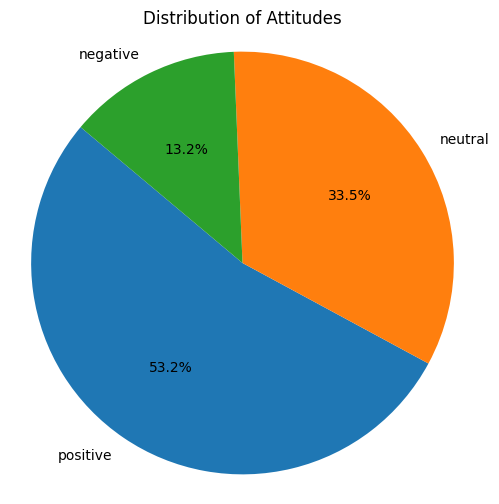

In [221]:
sentiment_counts = df['sentiment_category'].value_counts()# Calculate the number of occurrences for each unique sentiment category
print("Number of each attitude:")
print(sentiment_counts)

# Drawing pie charts
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attitudes')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


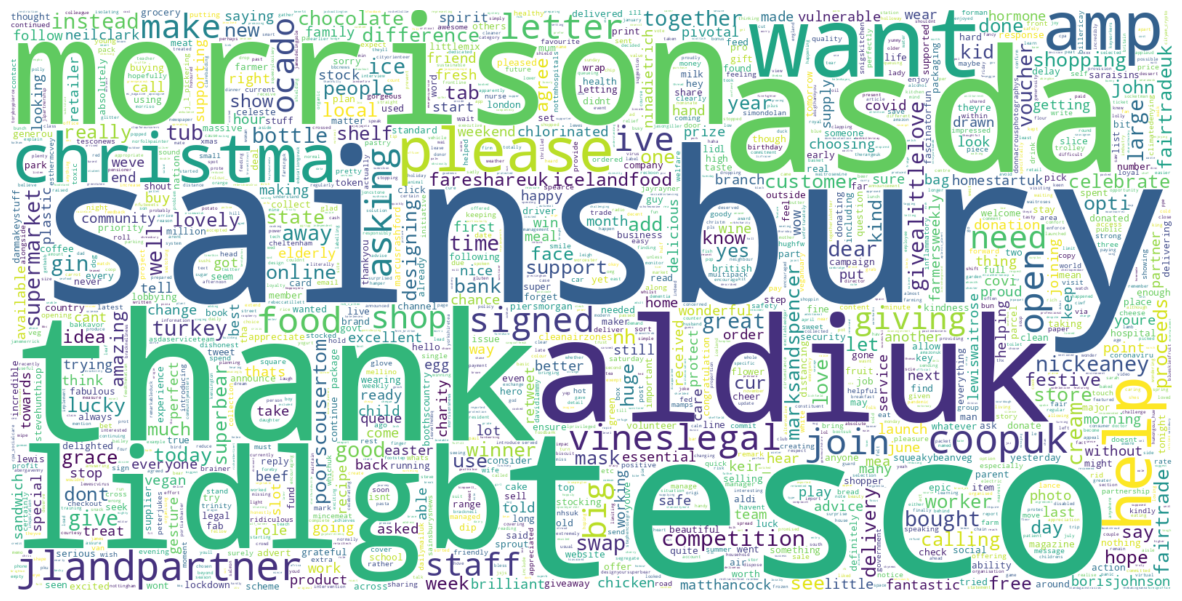

In [222]:
texts = df[df['sentiment_category'] == 'positive']['processed_text']#Filter and collect texts where the sentiment category is 'positive'
cleaned_texts = [" ".join(text.split()) for text in texts if isinstance(text, str)]# Ensure each text is a string and normalize white spaces
combined_text = " ".join(cleaned_texts)# Combine all cleaned texts into one large string
#Drawing word cloud
wc = WordCloud(background_color='white', max_words=2000, width=1600, height=800, collocations=False).generate(combined_text)#Set the background color to white, limit to 2000 most common words, and set the dimensions
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


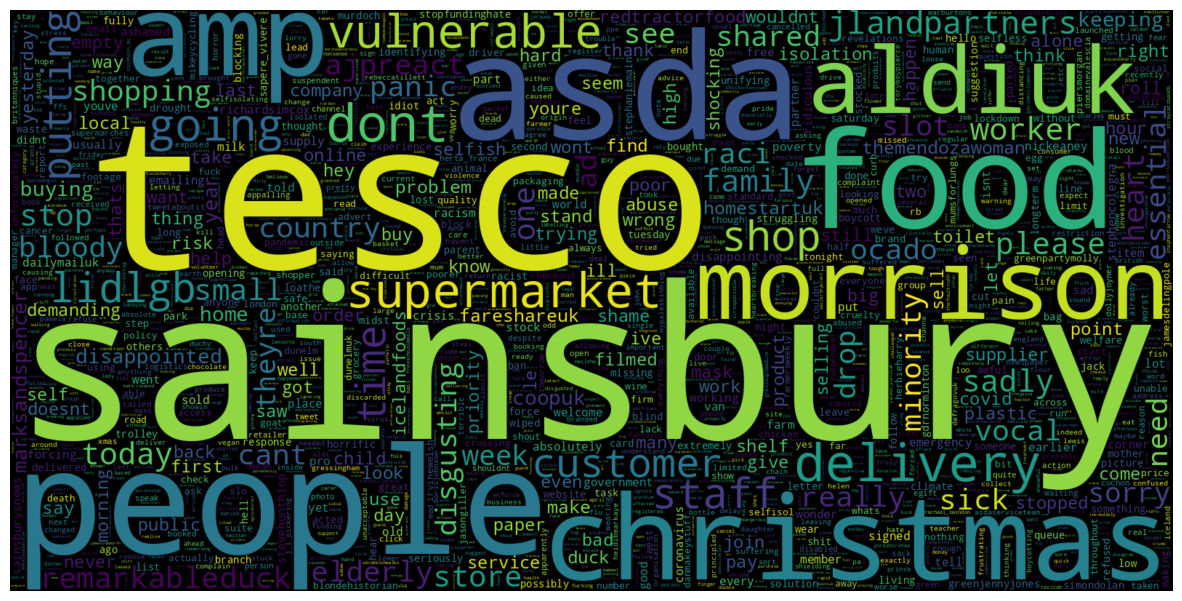

In [223]:
texts = df[df['sentiment_category'] == 'negative']['processed_text']#Filter and collect texts where the sentiment category is 'negative'
cleaned_texts = [" ".join(text.split()) for text in texts if isinstance(text, str)]# Ensure each text is a string and normalize white spaces
combined_text = " ".join(cleaned_texts)# Combine all cleaned texts into one large string
#Drawing word cloud
wc = WordCloud(max_words=2000, width=1600, height=800, collocations=False).generate(combined_text)
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# LDA model

In [224]:
#LDA model
#Splits a string into words based on spaces and filters out any empty strings
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
        if word!='':
           words.append(word)
    return words

df['tokens']=df.processed_text.apply(generate_tokens)#Storing the generated tokens in a new column named 'tokens'
df['tokens'][0]

def create_dictionary(words):
    return corpora.Dictionary(words)

## Create a dictionary from the 'tokens' column of the DataFrame
id2word=create_dictionary(df['tokens'])
print(id2word)

# Function to create a document-term matrix
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus

corpus=create_document_matrix(df['tokens'],id2word)# Create the document-term matri
# Display tokens and their corresponding bag-of-words for the first and second documents
print(df['tokens'][0])
print(corpus[0])
print(df['tokens'][1])
print(corpus[1])

id2word[10]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=100, )# Initialize and train an LDA model

#Visualisation
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=10)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<25869 unique tokens: ['delicious', 'donating', 'friend', 'helpthemhelpus_', 'hero']...>
['helpthemhelpus_', 'friend', 'potsandco', 'pudding', 'donating', 'profit', 'sale', 'delicious', 'new', 'tiramisu', 'hero']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
['hooodiniiii', 'rohh', 'samuel', 'sainsburys', 'malcolm_mlw', 'toobut', 'ill', 'definitely', 'shopping', 'sainsburys']
[(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1)]


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.448593 -0.028854       1        1  17.504079
9      0.055405  0.089007       2        1  12.587804
6     -0.251013  0.315795       3        1  11.780320
4      0.178585 -0.118456       4        1  10.359714
5      0.335972 -0.075397       5        1   9.902871
8      0.293344  0.210392       6        1   8.100959
7      0.040888  0.320659       7        1   7.988445
0      0.102622 -0.357169       8        1   7.661225
1     -0.166111 -0.050662       9        1   7.215614
2     -0.141101 -0.305314      10        1   6.898967, topic_info=            Term         Freq        Total Category  logprob  loglift
50         tesco  5278.000000  5278.000000  Default  10.0000  10.0000
16    sainsburys  5324.000000  5324.000000  Default   9.0000   9.0000
46      morrison  3427.000000  3427.000000  Default   8.0000   8.0000
88        lidlgb  2887.000000  2887.000000  Default   7.0000   7.0000
82        aldiuk  3273.000000  3273.000000  Default   6.0000   6.0000
..           ...          ...          ...      ...      ...      ...
544         away   474.231376   584.272758  Topic10  -3.5307   2.4651
684  competition   392.076349   544.820866  Topic10  -3.7209   2.3448
184         time   388.781060   922.907816  Topic10  -3.7293   1.8093
686         john   189.795568   245.332718  Topic10  -4.4464   2.4171
27     christmas   209.725848  1653.991988  Topic10  -4.3466   0.6087

[236 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
931       4  0.985266     abuse
145       6  0.993726     agree
3402      8  0.993687  ajpreact
82        1  0.935444    aldiuk
82        2  0.000306    aldiuk
...     ...       ...       ...
338       6  0.001744      year
338       7  0.334821      year
338       8  0.001744      year
338       9  0.125558      year
338      10  0.003488      year

[703 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 7, 5, 6, 9, 8, 1, 2, 3])

In [228]:
num_topics = lda_model.num_topics  # Number of subjects in the model
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)# Get keywords and weights for each topic

for topic_num, topic_data in topics:
    words, probs = zip(*[(word, prob) for word, prob in topic_data])# Extract keywords and corresponding weights for each topic
    topic_keywords = ", ".join(words)  # Merge keywords into a string
    rows.append({'Topic Number': topic_num, 'Keywords': topic_keywords})
    print(f"Topic {topic_num}: {topic_keywords}")

Topic 0: christmas, chocolate, fairtrade, get, fairtradeuk, weaniejeanie, family, would, wildlingrocks, russellmoxham
Topic 1: thank, much, great, good, would, point, hear, donation, bit, sorry
Topic 2: vineslegal, use, giving, away, voucher, competition, winner, time, lucky, christmas
Topic 3: sainsburys, tesco, morrison, asda, aldiuk, lidlgb, coopuk, marksandspencer, open, amp
Topic 4: jlandpartners, fareshareuk, homestartuk, amp, delivery, still, slot, get, love, first
Topic 5: nh, weaniejeanie, worker, supermarket, vanessafiji, russellmoxham, maruligultom, bron, people, find
Topic 6: want, christmas, help, ive, ocado, like, nickeaney, bought, make, bottle
Topic 7: together, say, time, need, customer, may, news, aldiuk, year, stop
Topic 8: please, shopping, borisjohnson, staff, matthancock, mask, let, neilclark, show, face
Topic 9: one, amp, thanks, supermarket, well, week, thank, staff, people, support


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Other

In [ ]:
#This code cannot be run at the same time as the code that generates the line graph above

df['created_at'] = pd.to_datetime(df['created_at'])# Convert the 'created_at' column to datetime type
positive_df = df[df['sentiment_category'] == 'positive']#Filtering out positive items
# Set the 'created_at' column as the DataFrame's index
df.set_index('created_at', inplace=True)
positive_df.set_index('created_at', inplace=True)

df_daily_counts = positive_df.resample('D').count()# Resample the DataFrame to daily frequency, counting cells for each column

# Drawing
plt.figure(figsize=(10, 5))
plt.plot(df_daily_counts.index, df_daily_counts['text'], marker='o', linestyle='-')
plt.title('Daily Data Counts')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()